In [ ]:
import pandas as pd
import numpy as np 
import networkx as nt
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv


In [ ]:
kd = pd.read_csv('Keyword_data - Keyword_data.csv') #loading the dataframe
kd

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Subsidiary Staffing in Multinational Enterpris...,INTERNATIONAL business enterprises -- Management,FOREIGN subsidiaries -- Management,EMPLOYEE selection,EXECUTIVES -- Recruiting,ORGANIZATIONAL sociology,ORGANIZATIONAL behavior,AGENCY theory,RESOURCE-based theory of the firm,PERSONNEL management,EMPLOYMENT in foreign countries,SUBSIDIARY corporations -- Management,HOST countries (Business)
62,"Strategic Human Resource Practices, Top Manage...",PERSONNEL management,COMPETITIVE advantage,BUSINESS networks,INDUSTRIAL management,STRATEGIC planning,SOCIAL networks,RESOURCE management,RESOURCE-based theory of the firm,HUMAN capital -- Management,INTELLECTUAL capital,DECISION making,INDUSTRIAL efficiency
63,Compensation Policy and Organizational Perform...,COMPENSATION management,ORGANIZATIONAL behavior,PERSONNEL management,HOSPITALS -- Administration,MANAGEMENT,FINANCIAL performance,WAGE payment systems,RESOURCE management,ORGANIZATIONAL effectiveness,INDUSTRIAL efficiency,FINANCIAL management,INDUSTRIAL management
64,"Functional Background Identity, Diversity, and...",CROSS-functional teams,TEAMS in the workplace,GROUP identity,ORGANIZATIONAL behavior,MANAGEMENT,PERFORMANCE,PERSONNEL management,COMPETITIVE advantage,ORGANIZATIONAL effectiveness,GROUP decision making,ORGANIZATIONAL structure,ORGANIZATIONAL sociology


In [ ]:
kds=kd.drop(kd[kd['Keyword 1'].isna()==True].index,axis=0)

In [ ]:
kds.isnull().sum() # checking for null values 

Title          0
Keyword 1      0
Keyword 2      0
Keyword 3      0
Keyword 4      0
Keyword 5      0
Keyword 6      1
Keyword 7      1
Keyword 8      1
Keyword 9      3
Keyword 10     5
Keyword 11    29
Keyword 12    38
dtype: int64

In [ ]:
kds

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,Bidding Wars Over R&D-Intensive Firms: Knowled...,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
7,When “The Show Must Go On”: Surface Acting and...,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
8,Relationships among Supervisors' and Subordina...,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
9,Punctuated Equilibrium and Linear Progression:...,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
13,The Relationship between Overconfidence and th...,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Governance Through Ownership: Centuries of Pra...,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN


In [ ]:
kd_subset=kds.set_index('Title') #setting title as index 

### **Analysis for Task**

In [ ]:
kd_subset = kd_subset.T.to_dict('list') # using this dataframe creating a dictonary using titles as key and keywords as values 

In [ ]:
kd_subset

{'Meta-Analyses of Financial Performance and Equity: Fusion or Confusion?': ['EQUITY',
  'ORGANIZATIONAL sociology',
  'PERFORMANCE',
  'META-analysis',
  'PSYCHOMETRICS',
  'ORGANIZATIONAL research',
  'FINANCIAL performance',
  'AGENCY theory',
  'ORGANIZATIONAL effectiveness',
  'ORGANIZATIONAL behavior',
  'CORPORATE governance',
  nan],
 'Home Country Environments, Corporate Diversification Strategies, and Firm Performance': ['DIVERSIFICATION in industry',
  'BUSINESS planning',
  'PERFORMANCE standards',
  'EMPLOYEES -- Rating of',
  'CORPORATE culture',
  'STRATEGIC planning',
  'ORGANIZATIONAL effectiveness',
  'MANAGEMENT science',
  'MANAGEMENT research',
  'PRODUCT management',
  nan,
  nan],
 'Safeguarding Investments in Asymmetric Interorganizational Relationships: Theory and Evidence': ['INTERORGANIZATIONAL relations',
  'INTERGROUP relations',
  'BUSINESS communication',
  'INVESTMENTS',
  'SUPPLY chains',
  'KNOWLEDGE management',
  'INTERORGANIZATIONAL networks',
  'CO

In [ ]:
#Running through the entire dataframe and found all unique words and appended into a list
new = []
for i in range(1, len(kds)):
  for col in kd.iloc[:, i:i+1]:
    for row in kd.iloc[:,1:][col].dropna():
     if row not in new:
      new.append(row)

In [ ]:
len(new) # 248 different unique keywords found 

248

In [ ]:
#after finding the unique keywords from the data frame creating exact same length of matrix i.e 248 x 248 
mat = np.zeros((len(new),len(new)))

In [ ]:
titlecomb=[] # created a new list 

In [ ]:
#Finding all pairs of combinations for each title and appending into a new list created above 

for i in range(1,49):
  x=list(kd_subset.keys())[i]
  y = kd_subset[x]
  z=combinations(y,2)
  t= list(z)
  titlecomb.append(t)

In [ ]:
# There are 49 titles in the dataframe,  so  for each a list is created inside a list ,s o there are 54 list each having combinations of their keywords 
len(titlecomb) 

48

In [ ]:
#flatening those given list 
flat_list = [item for sublist in titlecomb for item in sublist] # unravelling / Flattening a nested list

In [ ]:
#For each title combination is performed and they all are appended into one list and that list contain total of 3564 pairs of combinations 
len(flat_list)

3168

In [ ]:
#creating a new dataframe and sending all pairs of combination into a dataframe
df_key=pd.DataFrame(flat_list,columns=['k1','k2'])
#creatiung a temp variable and assigning a value as 1
df_key['temp']=1

In [ ]:
df_key

,k1,k2,temp
0,DIVERSIFICATION in industry,BUSINESS planning,1
1,DIVERSIFICATION in industry,PERFORMANCE standards,1
2,DIVERSIFICATION in industry,EMPLOYEES -- Rating of,1
3,DIVERSIFICATION in industry,CORPORATE culture,1
4,DIVERSIFICATION in industry,STRATEGIC planning,1
...,...,...,...
3163,DECISION making,CUSTOMER orientation,1
3164,DECISION making,MARKETING strategy,1
3165,CUSTOMER satisfaction,CUSTOMER orientation,1
3166,CUSTOMER satisfaction,MARKETING strategy,1


In [ ]:
#Now we have a dataframe containing all pairs of combinations ( these pairs are found indivisualy for each title and merged into one list )
#Now we have used group by function to group similar keyword pairs and used the count function to count them 
df_final=df_key.groupby(['k1','k2'])['temp'].count().reset_index()

In [ ]:
#Now in the finial result we can see how manys time each pair of keywords repeated in the dataframe 
df_final

,k1,k2,temp
0,AGENCY theory,BOARDS of directors,1
1,AGENCY theory,CORPORATE governance,1
2,AGENCY theory,DECISION making,1
3,AGENCY theory,EMPLOYEE ownership,1
4,AGENCY theory,EMPLOYMENT in foreign countries,1
...,...,...,...
2187,WORKFLOW,GROUP decision making,1
2188,WORKFLOW,MANAGEMENT,1
2189,WORKFLOW,MANAGEMENT science,1
2190,WORKFLOW,ORGANIZATIONAL behavior,1


In [ ]:
#Now we have the value i.e the number of times each pair of keyword repeated in a dataframe 
#iterating through the index of df_final  
for i in df_final.index:
    # assigning the each words of K1 and K2 and temp value into a variable x and y and z 
    x=df_final['k1'][i]
    y=df_final['k2'][i]
    z= df_final['temp'][i]
    #finding the index of each variable x and y in the unique list which we created in the begining as new 
    q=new.index(x)
    w=new.index(y)
    # assigning the temp value into matrix for the index found. 
    mat[q,w]=z
    mat[w,q]=z



In [ ]:
#final matrix 
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#converting the matrix into network graph 
net = nt.from_numpy_matrix(mat, parallel_edges=False)


In [ ]:
#finiding nodes , edges , degree and weight degree )
print("Nodes ",net.number_of_nodes() )
print("Edges ",net.number_of_edges() )
print("network info  ", net)
print('Degree', net.degree())
print("weighted degree", net.degree(weight='weight'))

Nodes  248
Edges  2103
network info   Graph with 248 nodes and 2103 edges
Degree [(0, 0), (1, 18), (2, 24), (3, 31), (4, 19), (5, 9), (6, 10), (7, 49), (8, 90), (9, 56), (10, 14), (11, 16), (12, 20), (13, 42), (14, 14), (15, 16), (16, 102), (17, 18), (18, 32), (19, 11), (20, 93), (21, 24), (22, 9), (23, 163), (24, 26), (25, 31), (26, 55), (27, 9), (28, 31), (29, 9), (30, 17), (31, 9), (32, 35), (33, 48), (34, 15), (35, 26), (36, 11), (37, 19), (38, 11), (39, 11), (40, 61), (41, 29), (42, 16), (43, 17), (44, 11), (45, 32), (46, 10), (47, 64), (48, 16), (49, 10), (50, 25), (51, 17), (52, 9), (53, 17), (54, 11), (55, 18), (56, 20), (57, 9), (58, 9), (59, 9), (60, 9), (61, 9), (62, 46), (63, 9), (64, 9), (65, 7), (66, 9), (67, 28), (68, 11), (69, 37), (70, 11), (71, 9), (72, 9), (73, 11), (74, 9), (75, 10), (76, 9), (77, 10), (78, 10), (79, 17), (80, 9), (81, 29), (82, 10), (83, 37), (84, 10), (85, 9), (86, 16), (87, 9), (88, 66), (89, 10), (90, 9), (91, 9), (92, 9), (93, 9), (94, 17), (95

In [ ]:
# Finding degree and creating a seperate dataframe as asked in the question
kd_degree = pd.DataFrame(net.degree, columns=['Nodes', 'Degree'])
kd_degree['Keywords'] = new

In [ ]:
kd_degree_head=kd_degree.sort_values(by=['Degree'], ascending=False).head(10)

In [ ]:
kd_degree_head

,Nodes,Degree,Keywords
23,23,163,ORGANIZATIONAL behavior
16,16,102,MANAGEMENT science
112,112,100,ORGANIZATIONAL effectiveness
20,20,93,PERSONNEL management
8,8,90,DECISION making
156,156,74,ORGANIZATIONAL structure
88,88,66,STRATEGIC planning
47,47,64,INDUSTRIAL management
40,40,61,ORGANIZATIONAL sociology
9,9,56,CORPORATE governance


In [ ]:
#finding strength and creating a seperate dataframe as asked in the question 
kd_strength = pd.DataFrame(net.degree(weight='weight'), columns=['Nodes', 'Strength'])
kd_strength['Keywords'] = new

In [ ]:
kd_strength_head=kd_strength.sort_values(by = ['Strength'], ascending= False).head(10)

In [ ]:
kd_strength_head

,Nodes,Strength,Keywords
23,23,199.0,ORGANIZATIONAL behavior
16,16,128.0,MANAGEMENT science
112,112,115.0,ORGANIZATIONAL effectiveness
20,20,110.0,PERSONNEL management
8,8,103.0,DECISION making
156,156,88.0,ORGANIZATIONAL structure
88,88,77.0,STRATEGIC planning
40,40,74.0,ORGANIZATIONAL sociology
26,26,73.0,TEAMS in the workplace
47,47,72.0,INDUSTRIAL management


In [ ]:
#assigning each pairs of keyword with their wieghts
lis = []
for i in range(0,248):
  for j in range(0,248):
    lis.append([kd_strength['Keywords'][i], kd_strength['Keywords'][j], mat[i][j]])
kd1 = pd.DataFrame(lis, columns =['key1', 'key2', 'weight'], dtype = float) 


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
kd1.sort_values(by = ['weight'], ascending= False).head(10)


,key1,key2,weight
5720,ORGANIZATIONAL behavior,MANAGEMENT science,7.0
3991,MANAGEMENT science,ORGANIZATIONAL behavior,7.0
6488,TEAMS in the workplace,ORGANIZATIONAL sociology,5.0
9946,ORGANIZATIONAL sociology,TEAMS in the workplace,5.0
3988,MANAGEMENT science,PERSONNEL management,4.0
4976,PERSONNEL management,MANAGEMENT science,4.0
5849,ORGANIZATIONAL behavior,MANAGEMENT,4.0
35983,MANAGEMENT,ORGANIZATIONAL behavior,4.0
5724,ORGANIZATIONAL behavior,PERSONNEL management,4.0
4983,PERSONNEL management,ORGANIZATIONAL behavior,4.0


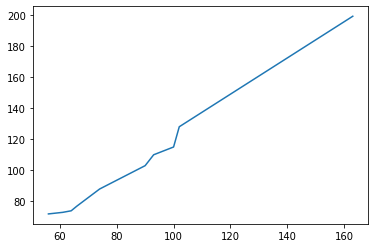

In [ ]:
#plotting degree vs strength as asked in the question 
plt.plot(kd_degree_head['Degree'], kd_strength_head['Strength'])

### If we had removed all the nan values the graph would have changed slightly, but we did not do that.
### To prevent from data loss

### **TASK2**

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob

import re
import string

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
import ssl
''' SSl Certificate'''
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
# words = set(nltk.corpus.words.words())

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()


import networkx as nx
from nltk import bigrams

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
path = '/content/drive/MyDrive/archive/*'

#Retrieving tweet files from the given path and sorting according to name of the file and taking last 6 files(2017-2022)
files = sorted(glob.glob(path))[-6:]
files

['/content/drive/MyDrive/archive/2017.csv',
 '/content/drive/MyDrive/archive/2018.csv',
 '/content/drive/MyDrive/archive/2019.csv',
 '/content/drive/MyDrive/archive/2020.csv',
 '/content/drive/MyDrive/archive/2021.csv',
 '/content/drive/MyDrive/archive/2022.csv']

In [ ]:
#To get the year from the file name string
files[0][-8:-4]

'2017'

In [35]:
def Tweet_Analysis(file):


    #Converting csv file to dataframe
    df1=pd.read_csv(file)

    #Converting tweet column to list and to string using join function and changing to lowercase to get proper count of words 
    text=''
    text = ' '.join(df1['tweet'].to_list())
    str1 = text.lower()
    
    #Removing URL link from the tweet text string
    l=str1.split()
    for i in l:
        if i.startswith("https:") or i.startswith("http:"):
            str1 = str1.replace(i,'')

    # Replacing string punctuation with a whitespace
    str2 = str1.translate(str1.maketrans(string.punctuation, ' '*len(string.punctuation)))

    str2 = re.sub(r'[^\w\s]', '', str2)

    #Removing numbers from the string(tweet text)
    str2 = re.sub(r'\d+', '', str2)

    #Coverting string to list of word tokens
    words = str2.split()
    stopwords_list = stopwords.words('english')
    # stopwords_list.extend(['all','co'])

    # Removing Stopwords from token list
    td_list=[]
    td_list = [word for word in words if word not in stopwords_list]

    # Creating frequency of words dictionary for a document
    freq_terms = {}
    for term in td_list:
        if term in freq_terms:
            freq_terms[term] += 1
        else:
            freq_terms[term] = 1
        
    #Converting dictionary to DataFrame that represents word and their count in the given year
    df = pd.DataFrame(freq_terms.items(), columns=['Word','Count'])

    #Sorting dataframe values in the descending order to retrieve top 10 words
    df = df.sort_values(by='Count',ascending=False).head(10)
    print(df)

    #Histogram of word frequencies in the given year
    plt.bar(df['Word'], df['Count'])
    plt.title(f'Words vs Count for the year {file[-8:-4]}')
    plt.xlabel('WORDS')
    plt.ylabel('COUNT')
    plt.show()

    #New column rank used to rank words from 1 to n(total no of distinct words)
    df['rank'] = range(1,df.shape[0]+1)

    #Log Scaling plot using loglog plot   
    plt.title('Loglog plot of Tweet words')
    plt.xlabel('LOG(RANK)')
    plt.ylabel('LOG(COUNT)')
    plt.loglog(df['rank'],df['Count']) 
    plt.show()
 #Bigrams Plot to understand the occurrences of pair of consecutive words in tweets**       
    G = nx.Graph() 	
    for words in list(nltk.bigrams(nltk.word_tokenize(str2)))[:150]:
        G.add_edge(words[0], words[1])
    plt.figure(3,figsize=(40,20))
    nx.draw_networkx(G)
    plt.show()


In [ ]:
 !pip uninstall networkx

In [ ]:
!pip install networkx==2.6
!pip install scipy==1.8
!pip install scipy --upgrade scipy
!pip install matplotlib==3.5.0

In [ ]:
!pip uninstall matplotlib


In [ ]:
!pip install matplotlib==3.5.0

In [ ]:
%matplotlib inline

### **2017**

/content/drive/MyDrive/archive/2017.csv
       Word  Count
1     tesla    323
131     amp    219
67    model    208
76     good    171
215  rocket    149
47     like    137
179     yes    133
206  spacex    132
211  launch    112
63     next    103


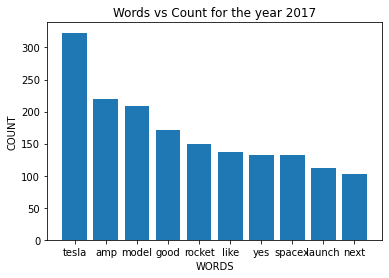

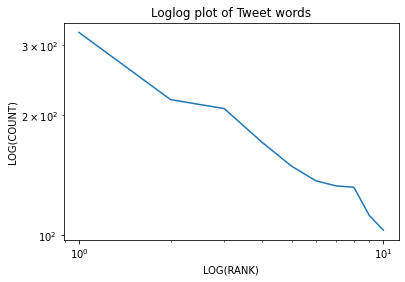

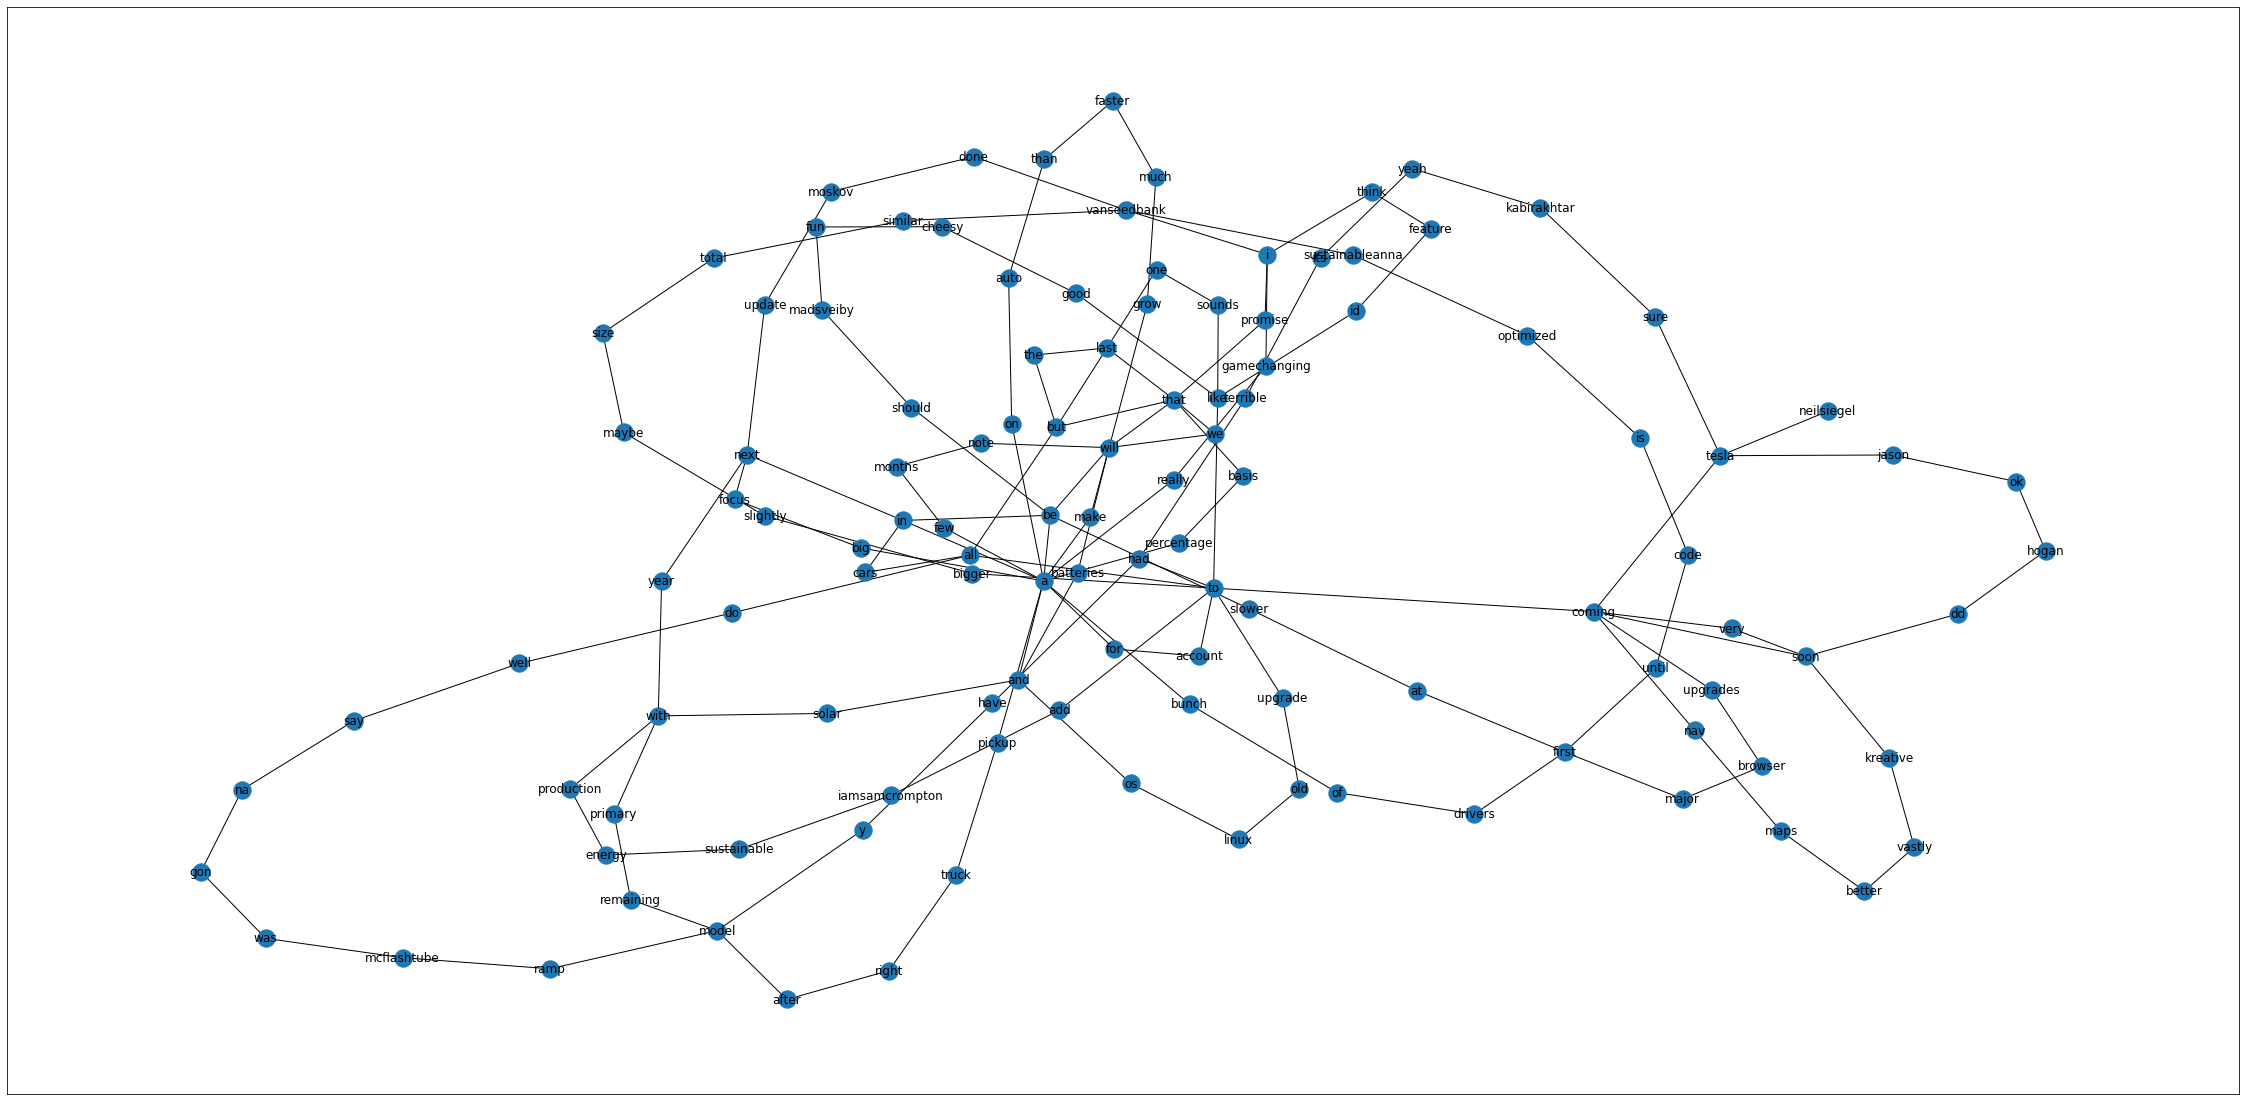

In [36]:
#2017 - Tweet table retrieved and Tweet Analysis function is called
print(files[0])
Tweet_Analysis(files[0])

## **In year 2017 we have just taken 150 pairs of nodes to display bigrams. Just to show how bigram looks in detail.** 

## **For the remaining years (i.e 2018,2019,2020,2021,2022) we have taken all pairs of nodes.**  

### **2018**

/content/drive/MyDrive/archive/2018.csv
       Word  Count
22      amp    527
3     tesla    453
142     car    120
36      yes    108
224    good    102
164   model     98
132    like     95
313  spacex     89
341   would     76
92     dont     74


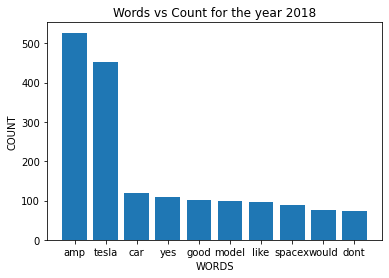

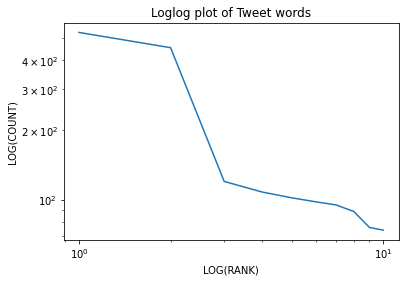

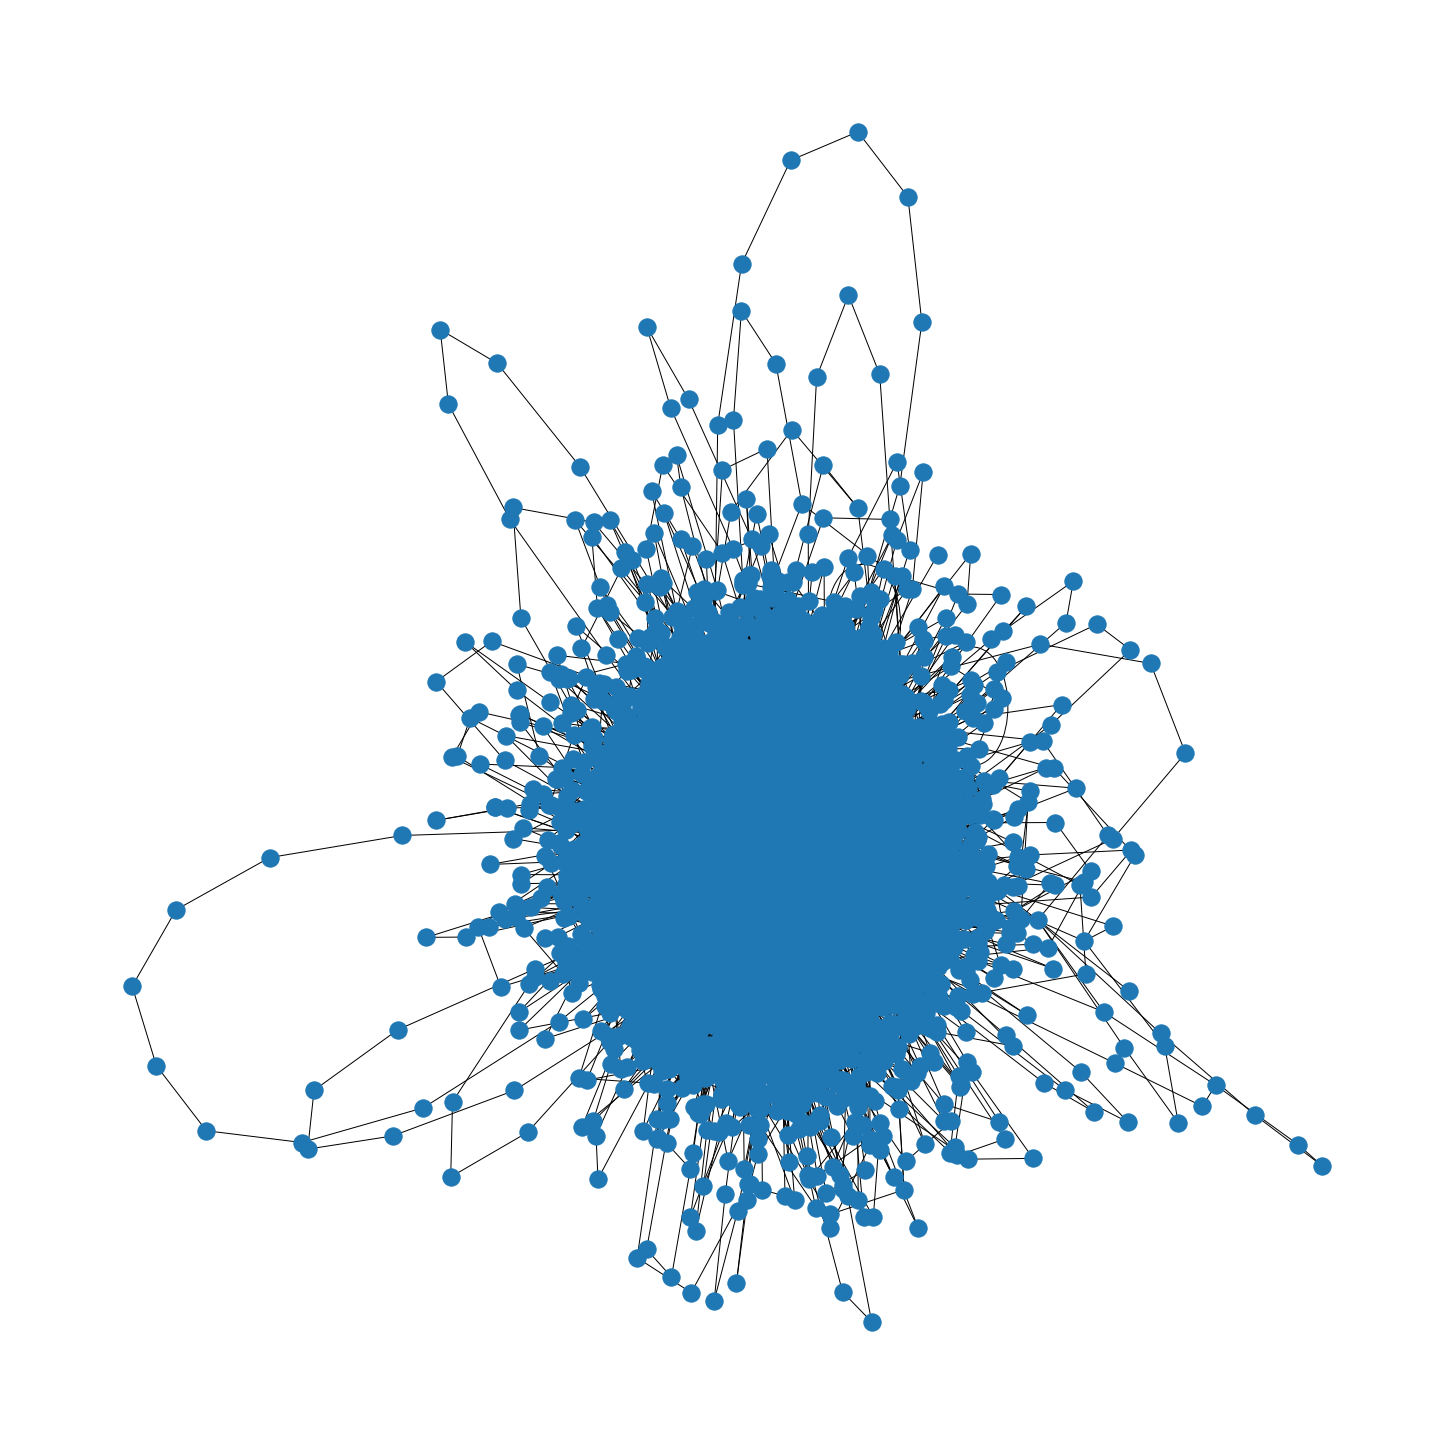

In [ ]:
#2018 - Tweet table retrieved and Tweet Analysis function is called
print(files[1])
Tweet_Analysis(files[1])

### **2019**

/content/drive/MyDrive/archive/2019.csv
               Word  Count
229           tesla   1399
15              amp   1218
196          spacex    435
126             yes    394
806           model    373
53             good    358
570            like    315
128  erdayastronaut    300
254             car    285
150           would    272


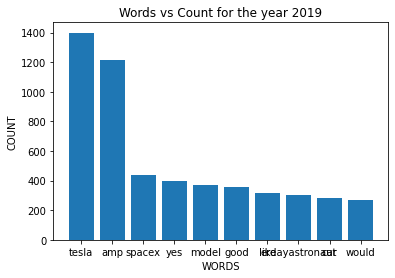

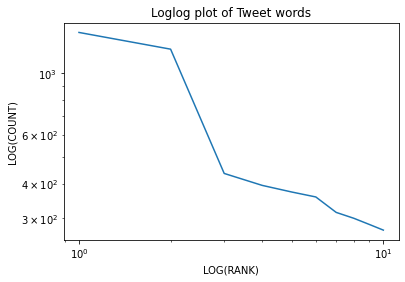

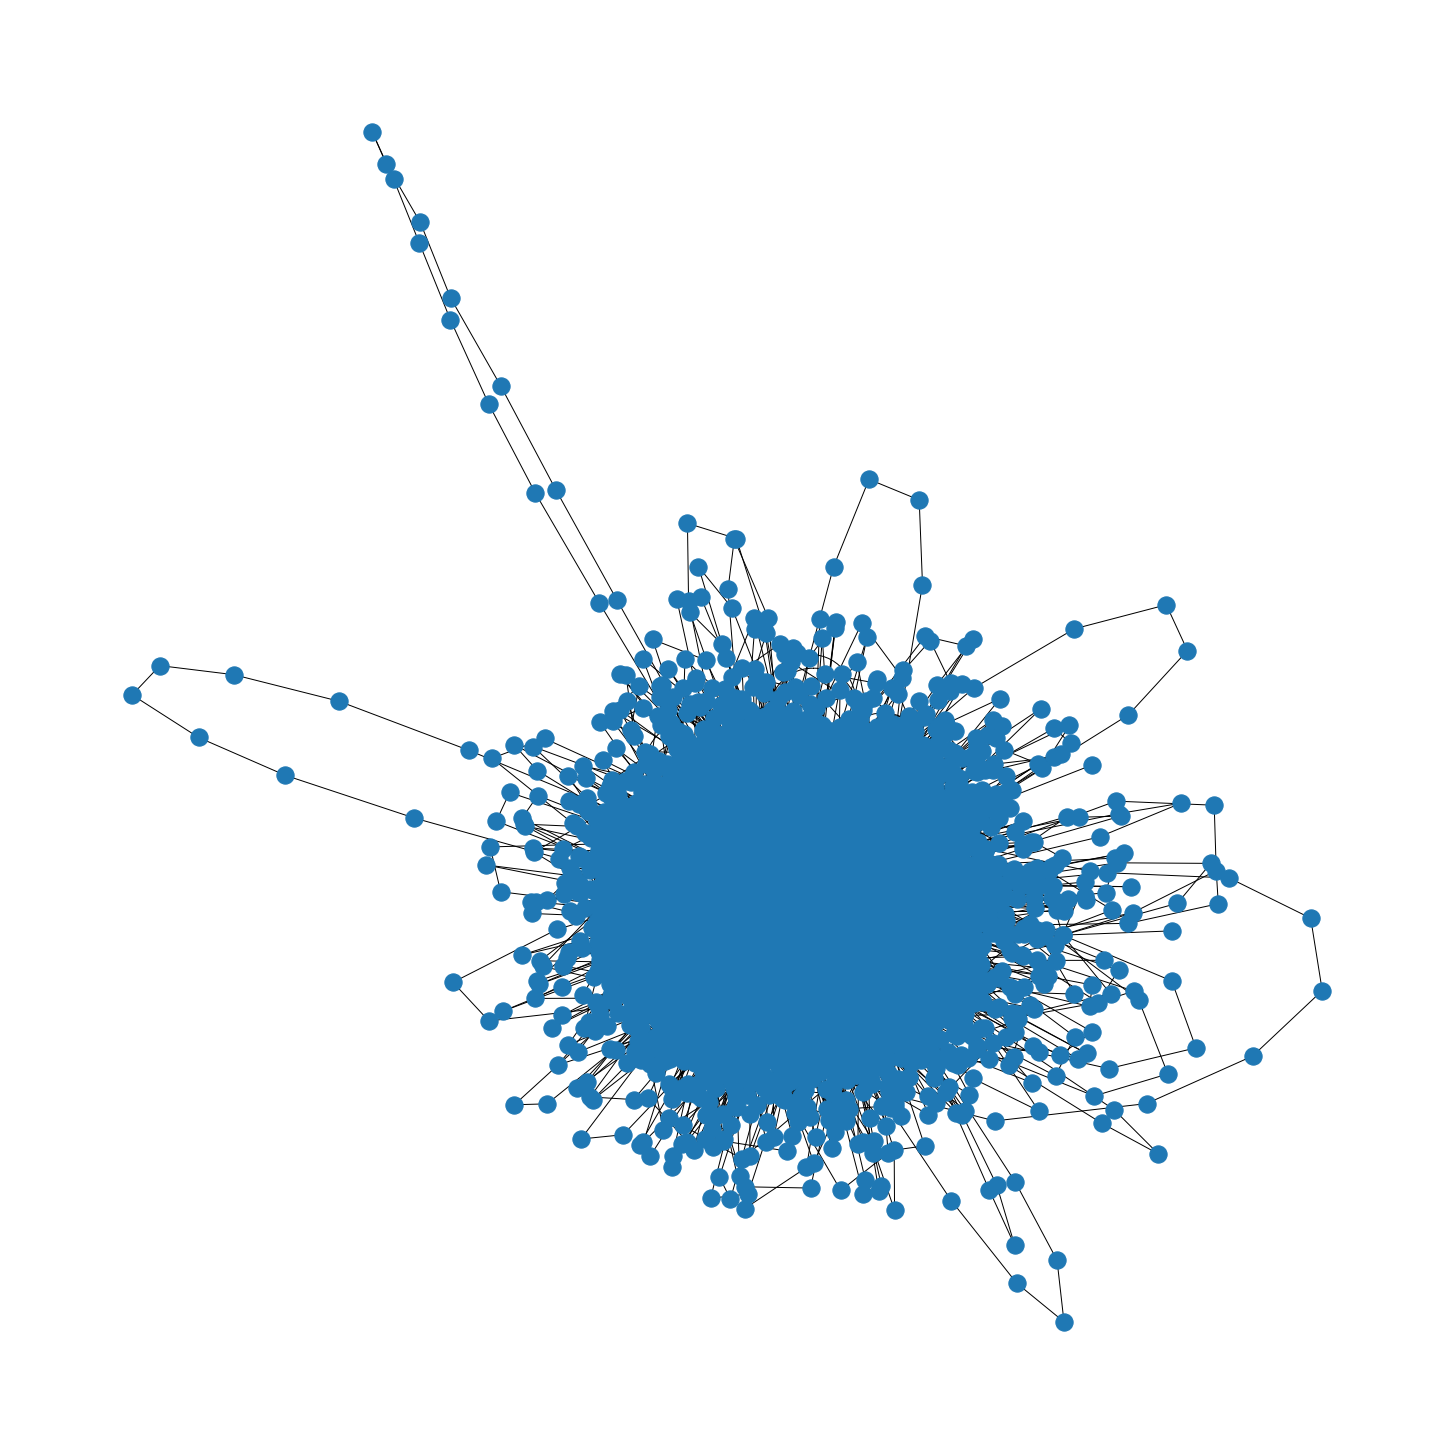

In [ ]:
#2019 - Tweet table retrieved and Tweet Analysis function is called
print(files[2])
Tweet_Analysis(files[2])

### **2020**

/content/drive/MyDrive/archive/2020.csv
               Word  Count
41              amp   1822
12            tesla   1781
412          spacex    645
151  erdayastronaut    561
86              yes    555
58             good    471
112         flcnhvy    424
283           model    404
83             like    395
31            great    372


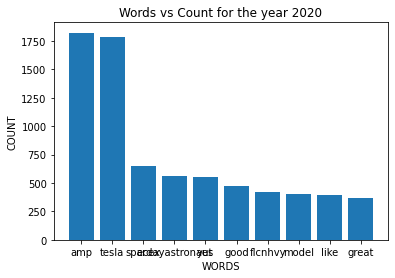

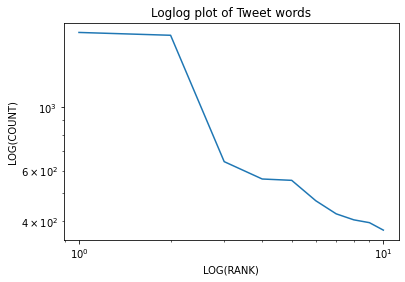

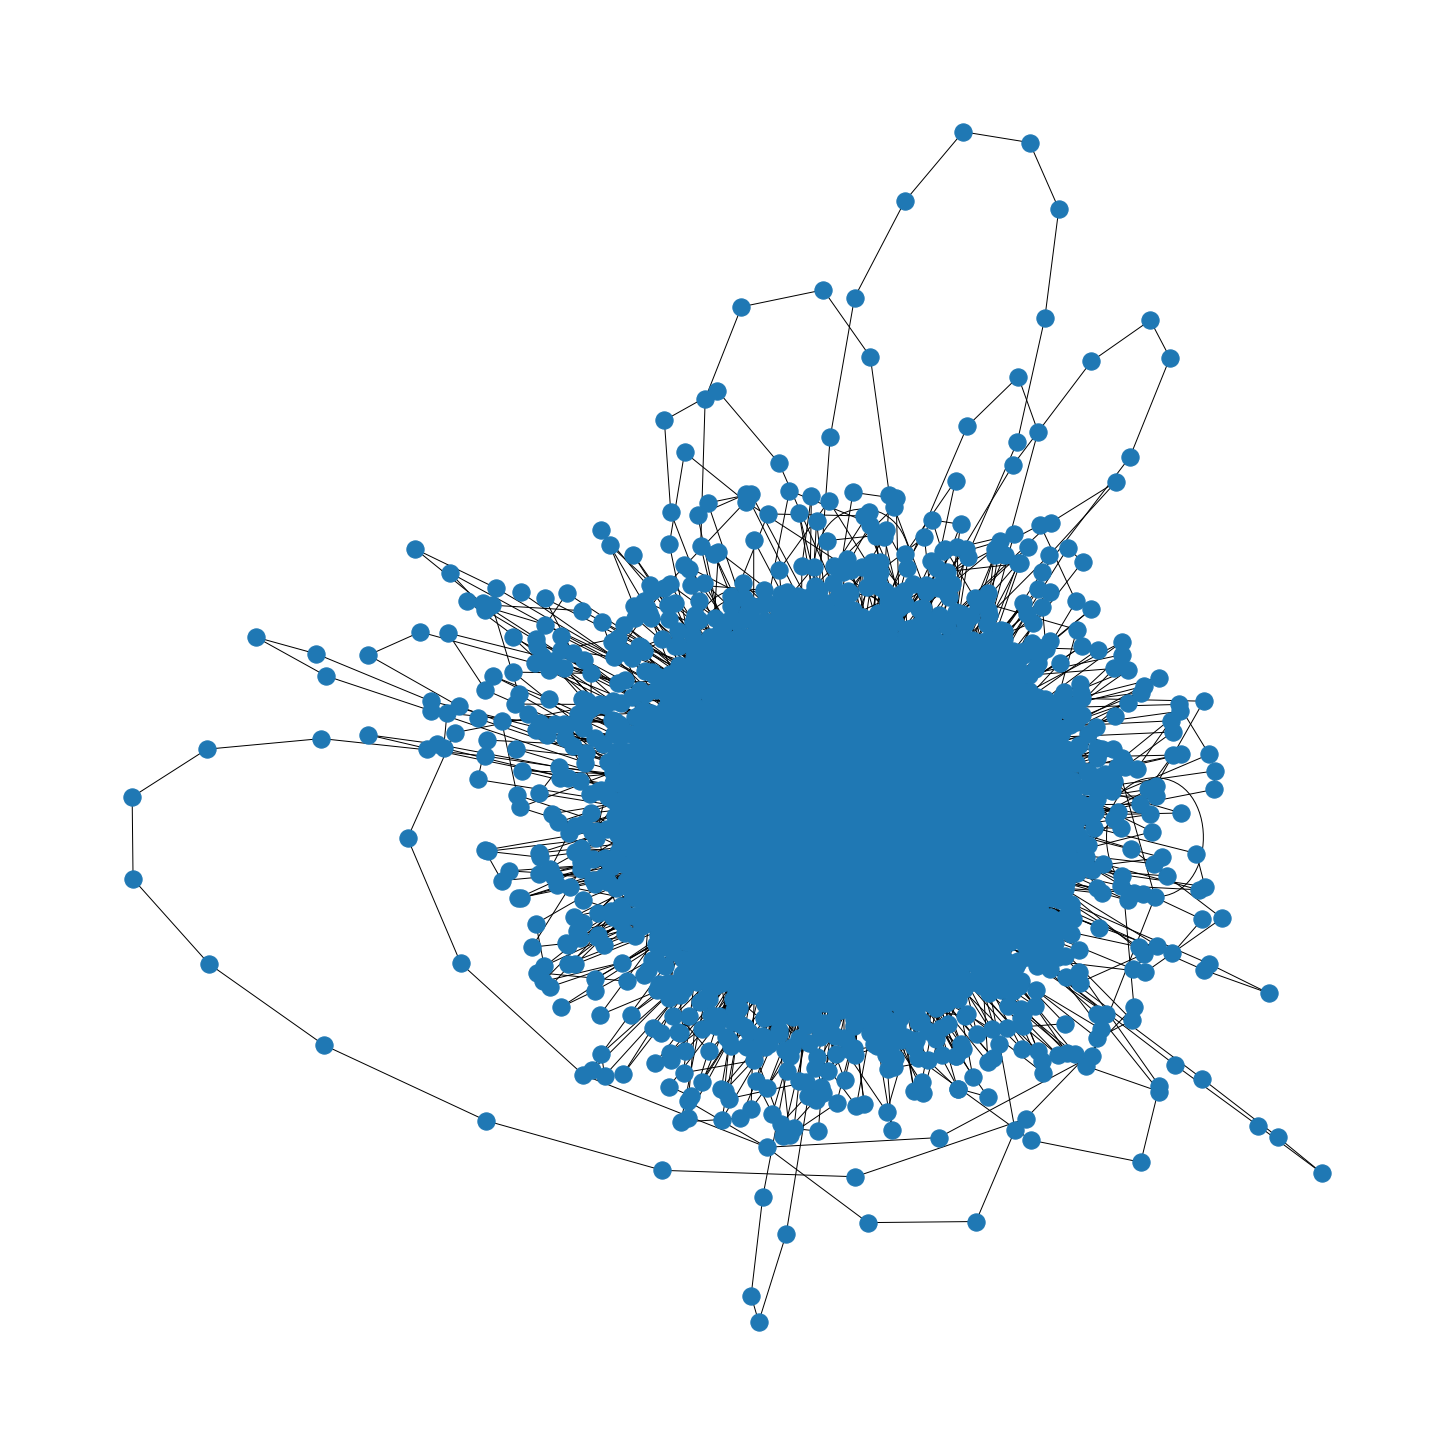

In [ ]:
#2020 - Tweet table retrieved and Tweet Analysis function is called
print(files[3])
Tweet_Analysis(files[3])

### **2021**

/content/drive/MyDrive/archive/2021.csv
               Word  Count
45              amp    476
1             tesla    364
364          spacex    248
153   wholemarsblog    189
438   teslaownerssv    119
36         ppathole    116
369  erdayastronaut    111
84            great    102
184            good     98
134            much     93


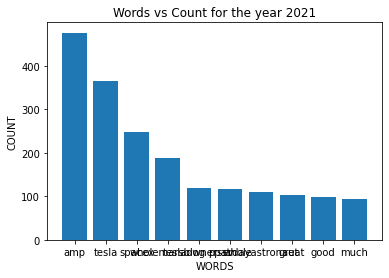

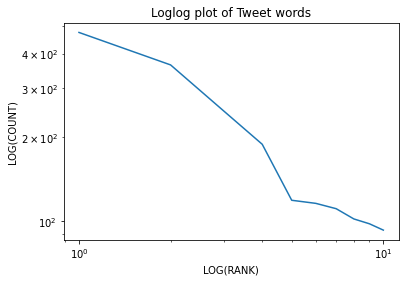

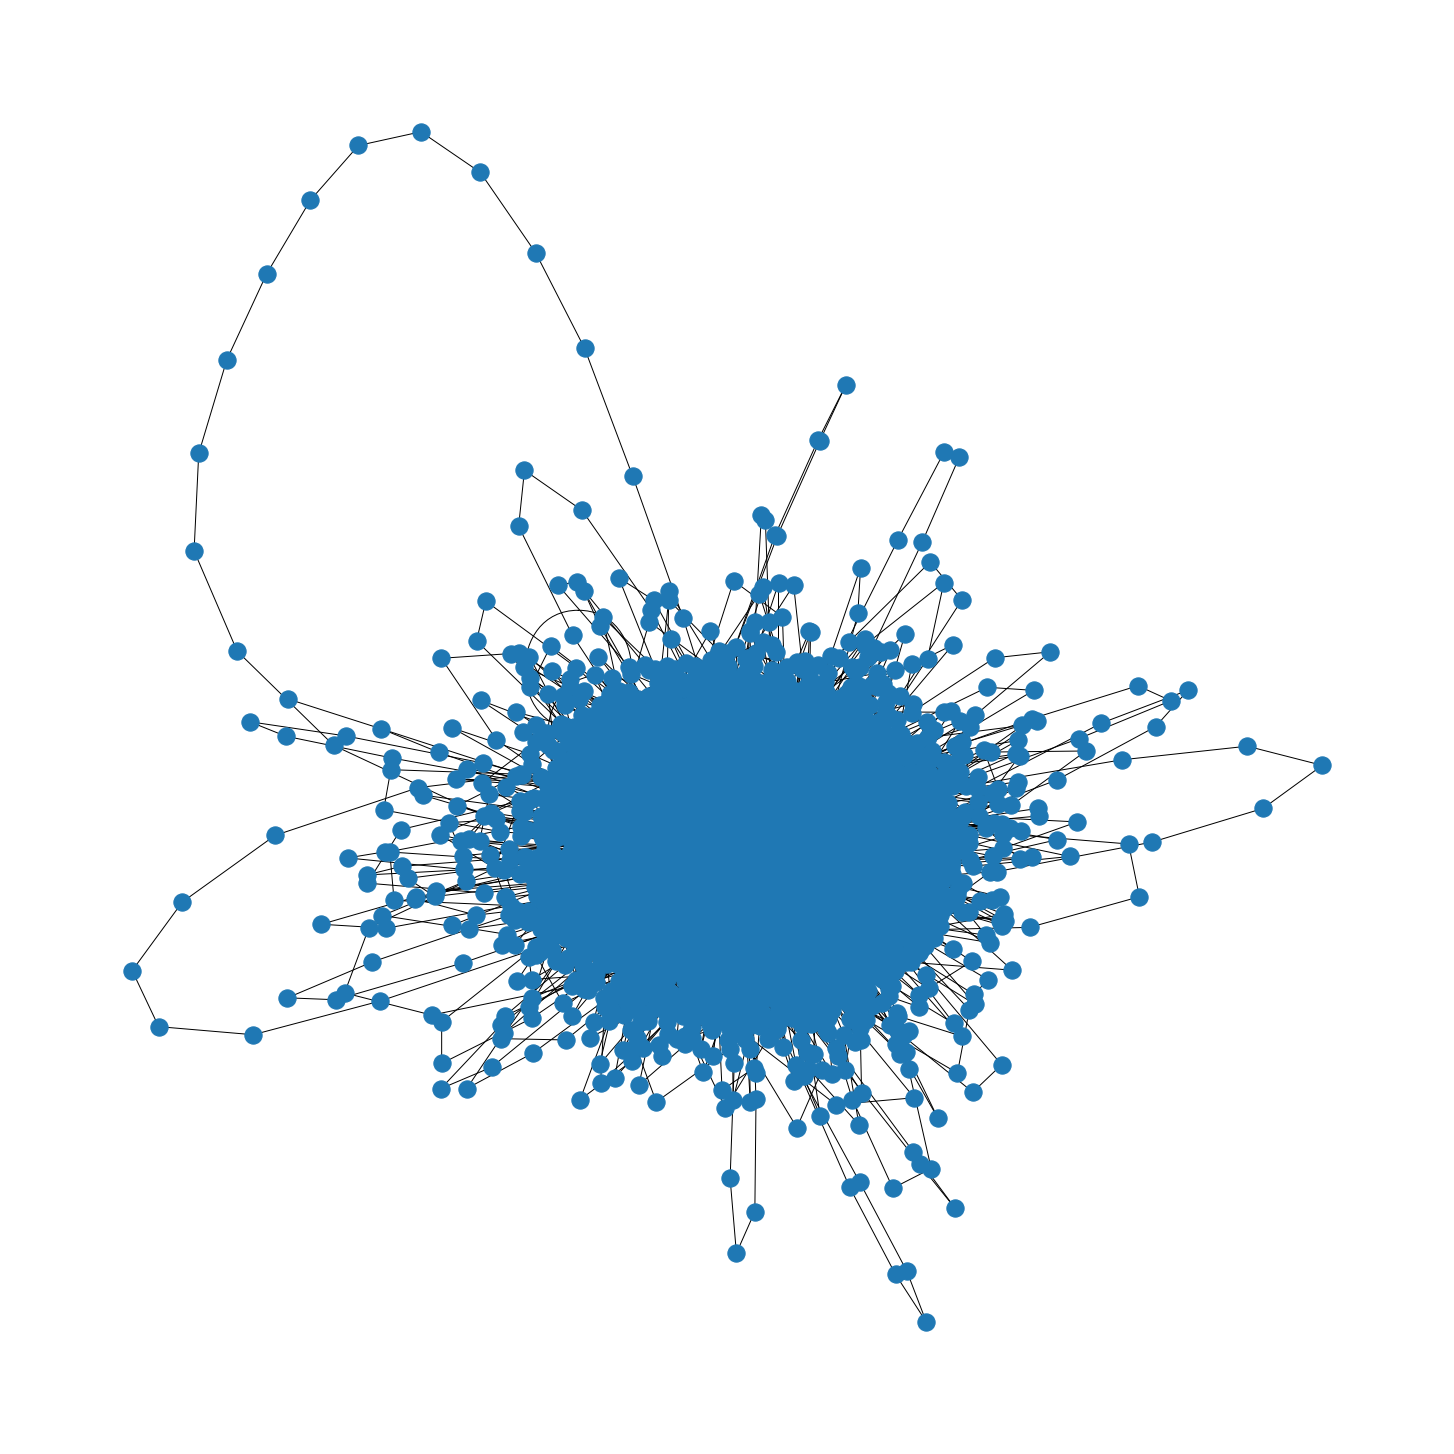

In [ ]:
#2021 - Tweet table retrieved and Tweet Analysis function is called
print(files[4])
Tweet_Analysis(files[4])

### **2022**

/content/drive/MyDrive/archive/2022.csv
              Word  Count
73           tesla    116
304  wholemarsblog     84
49             amp     80
45          spacex     56
5    teslaownerssv     50
777  sawyermerritt     36
64          people     34
128            yes     32
778        billymk     30
291            one     30


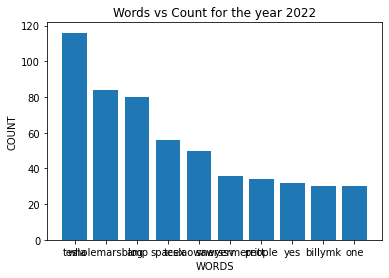

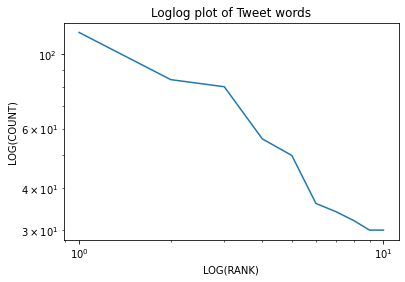

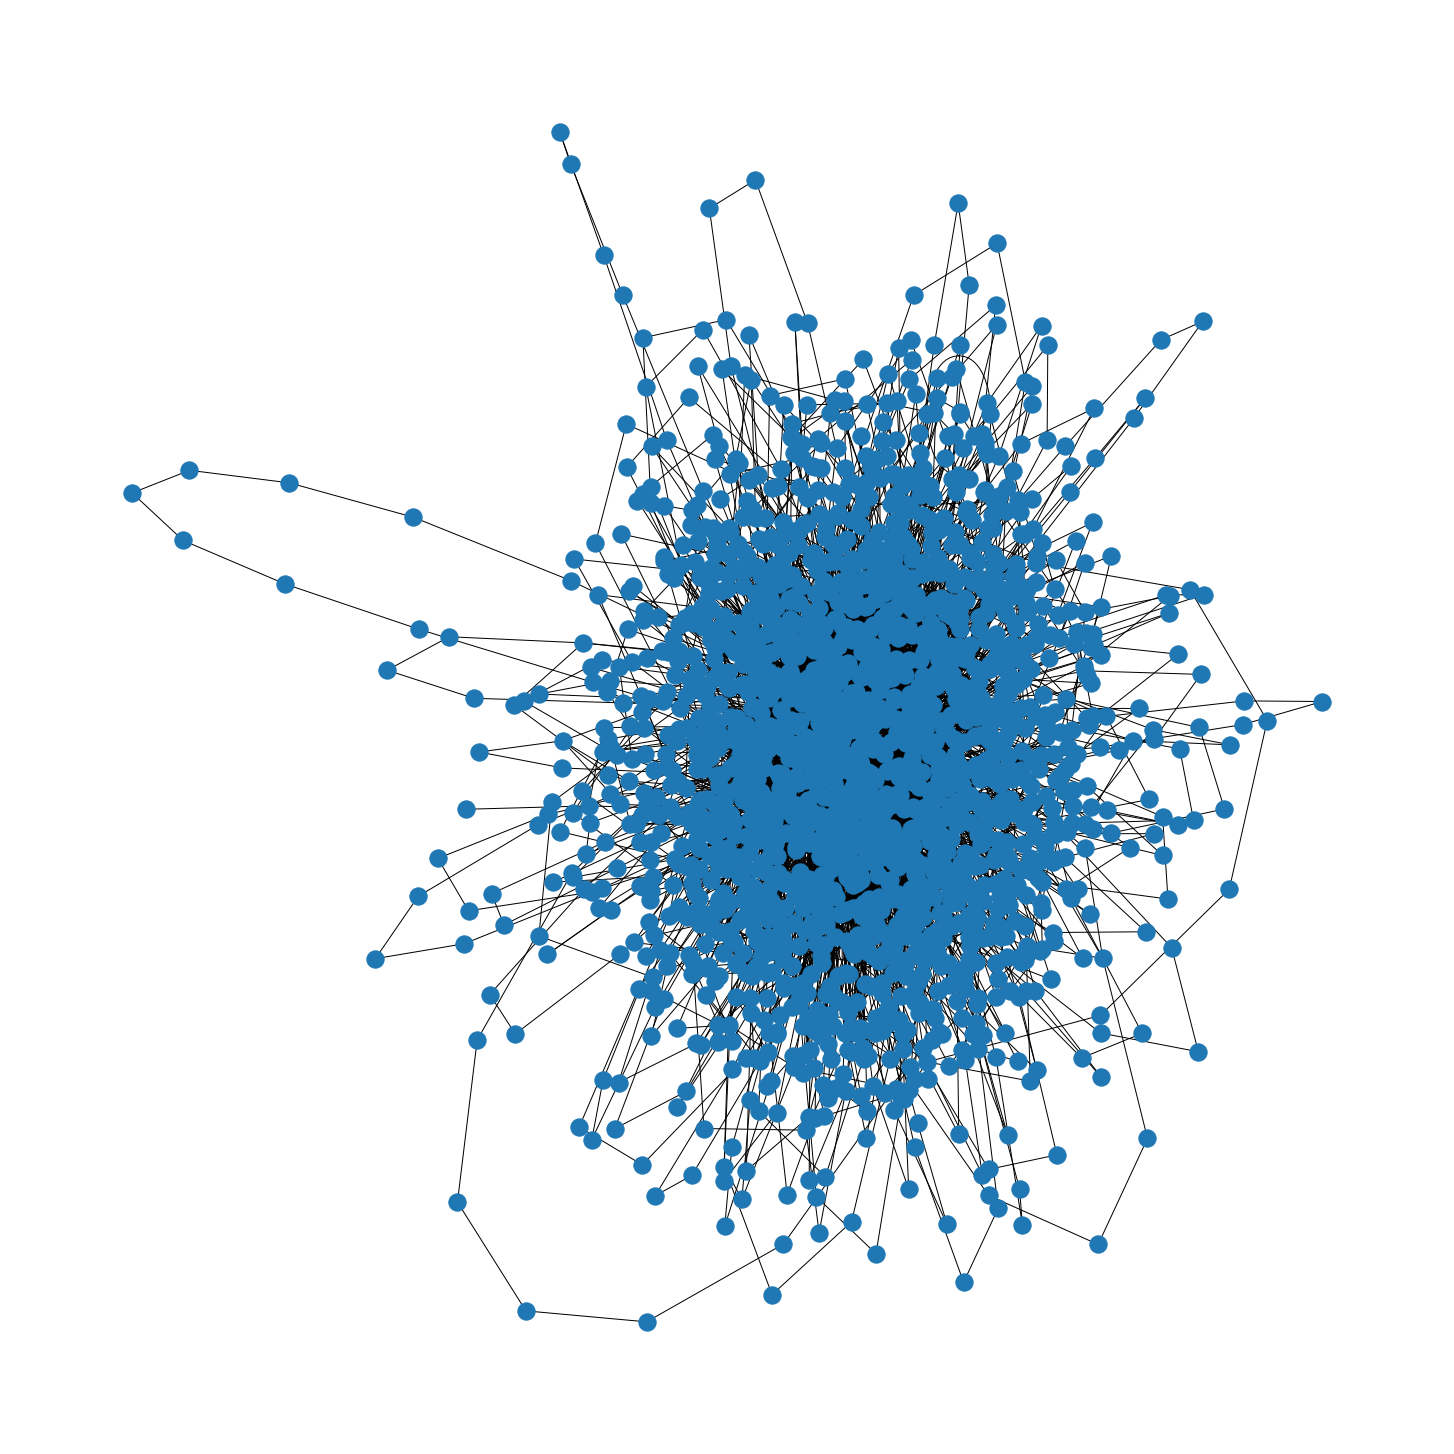

In [ ]:
#2022 - Tweet table retrieved and Tweet Analysis function is called
print(files[5])
Tweet_Analysis(files[5])

### **INFERENCE: 
**1.From log log plot: As the count of words increases the rank of the word becomes lower(making it more important word)**


**2.From Bigrams graph: all pair of consecutive words has occurred mostly once.**